# Bike Sharing Assignment

# 1. Importing and Understanding Data

In [1]:
#import the libraries
import pandas as pd
import numpy as np

#import the plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns


# for Splitting the Data into Training and Testing Sets
from sklearn.model_selection import train_test_split

# for rescaling using minmaxscaler
from sklearn.preprocessing import MinMaxScaler

# Importing RFE and Linear Regression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# for adding a constant variable 
import statsmodels.api as sm 

#Importing VIF for the model
from statsmodels.stats.outliers_influence import variance_inflation_factor

# to ignore warnings
import warnings
warnings.filterwarnings("ignore")

### data_dictionary
day_data_dictionary to understand the attributes(columns) which are useful for our analysis. 

day.csv have the following fields:
	
	- instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

In [2]:
# Importing day.csv
pd.set_option("display.max_columns", 100)
bike_sharing=pd.read_csv("day.csv")
bike_sharing

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [3]:
#Checking null values and dtypes for the dataframe
bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


**Observation:** No null values in the dataframe

# 2. Converting to Categorical variables

In [4]:
# Verifying the categories
print("Seasons=", bike_sharing.season.unique())
print("Years =", bike_sharing.yr.unique())
print("Months =", bike_sharing.mnth.unique())
print("holiday =", bike_sharing.holiday.unique())
print("Weekday =", bike_sharing.weekday.unique())
print("Workingday =", bike_sharing.workingday.unique())
print("Weathersit =", bike_sharing.weathersit.unique())

Seasons= [1 2 3 4]
Years = [0 1]
Months = [ 1  2  3  4  5  6  7  8  9 10 11 12]
holiday = [0 1]
Weekday = [6 0 1 2 3 4 5]
Workingday = [0 1]
Weathersit = [2 1 3]


In [5]:
# Defining a function to map the categorical variables to appropriate numbers
def season_map(x):
    return x.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

# Apply the function to the 'season' column of the dataframe
bike_sharing[['season']] = bike_sharing[['season']].apply(season_map)

# Print the final DataFrame
bike_sharing.season.value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [6]:
# Similarly Converting mnth, weekday, weathersit columns into categorical variables
bike_sharing['mnth']=bike_sharing['mnth'].replace({1:'jan',2:'feb', 3:'mar', 4:'apr', 5:'may', 6:'jun', 7:'jul', 8:'aug', 9:'sep', 10:'oct', 11:'nov', 12:'dec'})
bike_sharing[['weekday']]=bike_sharing['weekday'].replace({0: 'tue', 1: 'wed', 2: 'thu', 3:'fri', 4:'sat', 5:'sun', 6: 'mon'})
bike_sharing[['weathersit']]=bike_sharing[['weathersit']].replace({1: 'clear', 2: 'mist cloudy', 3: 'light snow/rain'})

#looking in to the dataframe
bike_sharing

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,jan,0,mon,0,mist cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,jan,0,tue,0,mist cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,jan,0,wed,1,clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,jan,0,thu,1,clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,jan,0,fri,1,clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,spring,1,dec,0,sat,1,mist cloudy,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,spring,1,dec,0,sun,1,mist cloudy,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,spring,1,dec,0,mon,0,mist cloudy,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,spring,1,dec,0,tue,0,clear,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [7]:
# to check the summary of stats
bike_sharing.describe()

,instant,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,0.500000,0.028767,0.683562,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,0.500343,0.167266,0.465405,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


# 3. Data visualisation

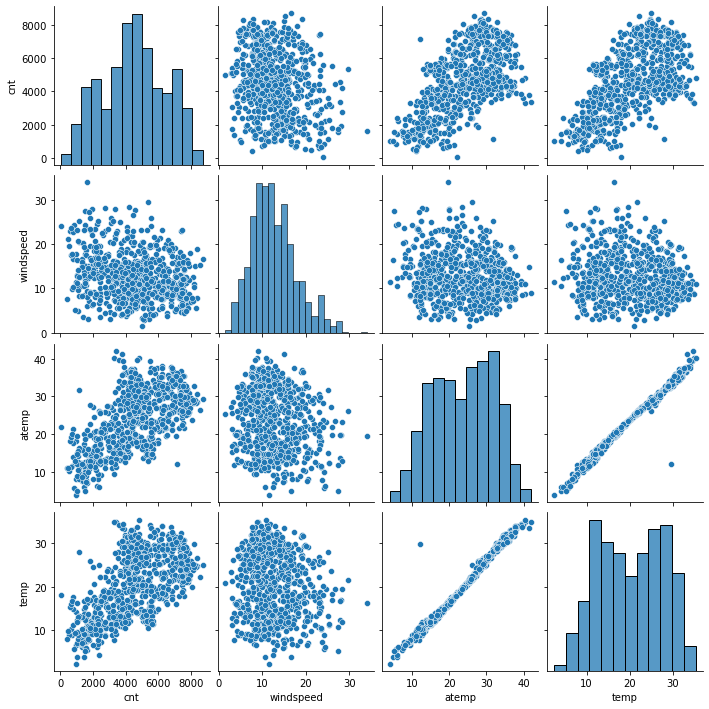

In [8]:
#pair plots for numeric variables

sns.pairplot(data=bike_sharing, vars=({'temp', 'atemp', 'windspeed', 'cnt'}))

<function matplotlib.pyplot.show(close=None, block=None)>

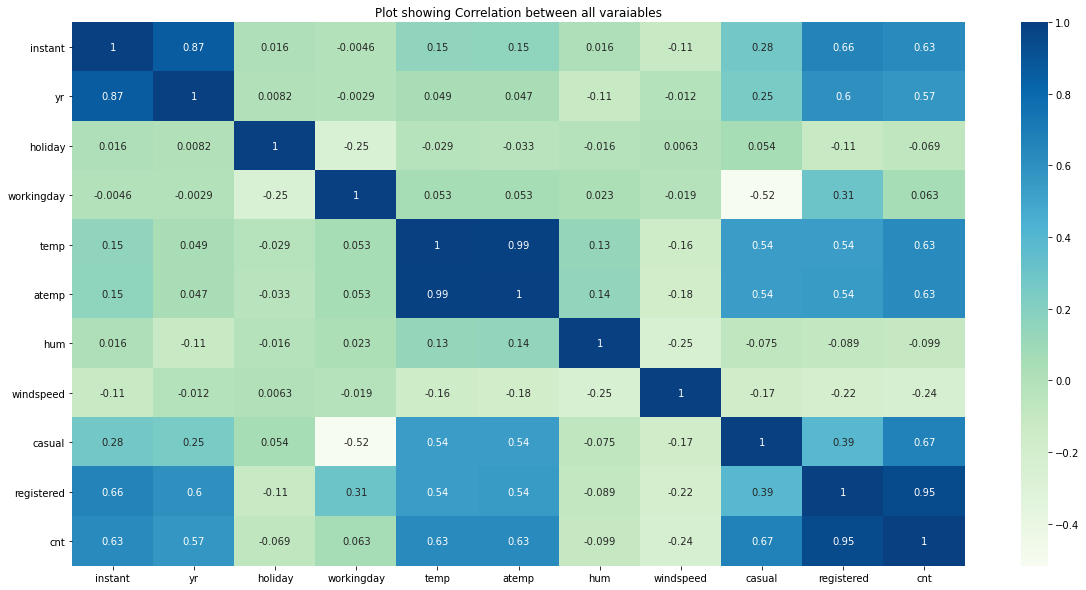

In [9]:
# heatmap to check correlation
plt.figure(figsize=(20,10))
plt.title("Plot showing Correlation between all varaiables")
sns.heatmap(data=bike_sharing.corr(), annot=True, cmap='GnBu')
plt.show

**Observations:**
- As per the pair plots and heatmap, `atemp` and `temp` are highly correlated to each other, we can use any one for our analysis.
- `dteday` column can be dropped, as the information is already present in `yr` and `mnth` columns.
- sum of `casual` and `registered` columns, gives the `cnt` column. Target varible for our Analysis is `cnt`, so we can drop `casual` and `registered` columns.
- `instant` is the index column, so we can drop that column.

# Data Cleaning

In [10]:
# Dropping redundant columns
bike_sharing_clean=bike_sharing.drop(columns=['instant', 'dteday', 'atemp', 'casual', 'registered'])

In [11]:
#Looking into df after droppping the redundant columns
bike_sharing_clean

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,jan,0,mon,0,mist cloudy,14.110847,80.5833,10.749882,985
1,spring,0,jan,0,tue,0,mist cloudy,14.902598,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,clear,8.050924,43.7273,16.636703,1349
3,spring,0,jan,0,thu,1,clear,8.200000,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,clear,9.305237,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...
725,spring,1,dec,0,sat,1,mist cloudy,10.420847,65.2917,23.458911,2114
726,spring,1,dec,0,sun,1,mist cloudy,10.386653,59.0000,10.416557,3095
727,spring,1,dec,0,mon,0,mist cloudy,10.386653,75.2917,8.333661,1341
728,spring,1,dec,0,tue,0,clear,10.489153,48.3333,23.500518,1796


<AxesSubplot:xlabel='weathersit', ylabel='cnt'>

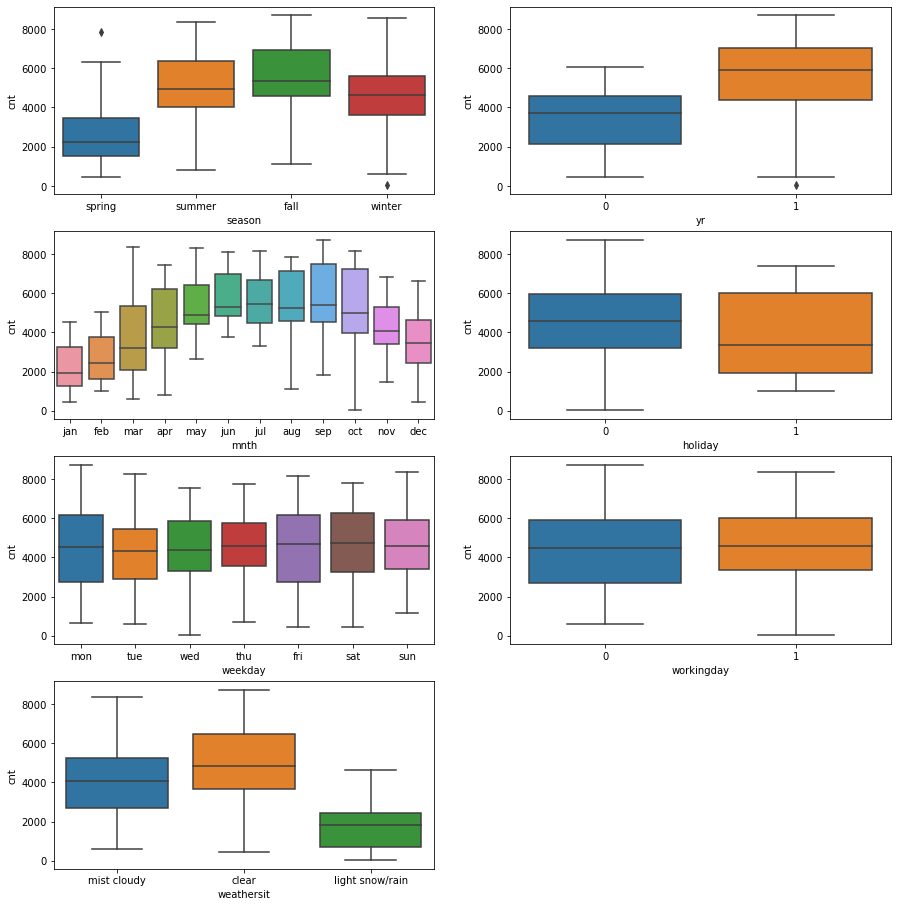

In [12]:
# As temp, hum, and windspeed are continuous variables, we will check box plots for other variables
plt.figure(figsize=(15,20))
plt.subplot(5, 2, 1)
sns.boxplot(x='season', y='cnt', data=bike_sharing_clean)
plt.subplot(5, 2, 2)
sns.boxplot(x='yr', y='cnt', data=bike_sharing_clean)
plt.subplot(5, 2, 3)
sns.boxplot(x='mnth', y='cnt', data=bike_sharing_clean)
plt.subplot(5, 2, 4)
sns.boxplot(x='holiday', y='cnt', data=bike_sharing_clean)
plt.subplot(5, 2, 5)
sns.boxplot(x='weekday', y='cnt', data=bike_sharing_clean)
plt.subplot(5, 2, 6)
sns.boxplot(x='workingday', y='cnt', data=bike_sharing_clean)
plt.subplot(5, 2, 7)
sns.boxplot(x='weathersit', y='cnt', data=bike_sharing_clean)


<function matplotlib.pyplot.show(close=None, block=None)>

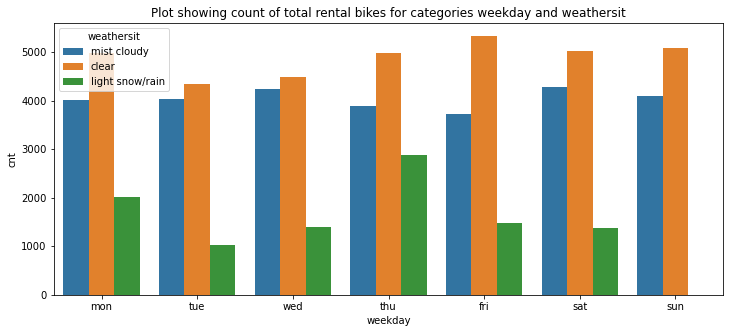

In [53]:
plt.figure(figsize=(12, 5))
plt.title("Plot showing count of total rental bikes for categories weekday and weathersit", size=12)
sns.barplot(data=bike_sharing_clean, x='weekday', y='cnt',hue='weathersit', ci=None)
plt.show

<AxesSubplot:title={'center':'Plot showing count of total rental bikes usage on season and workingday'}, xlabel='season', ylabel='cnt'>

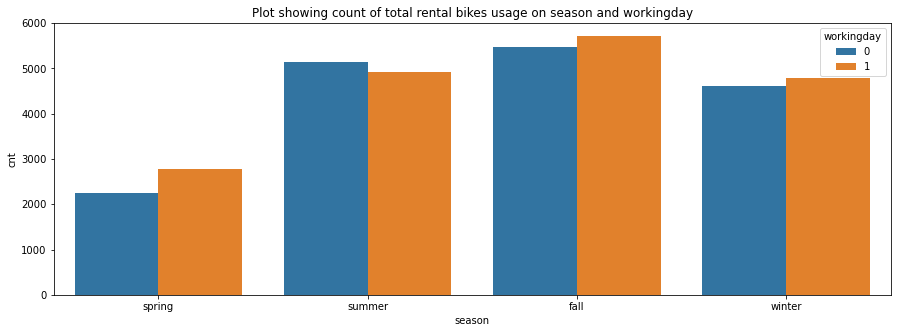

In [55]:
plt.figure(figsize=(15, 5))
plt.title("Plot showing count of total rental bikes usage on season and workingday", size=12)
sns.barplot(data=bike_sharing_clean, x='season', y='cnt', hue='workingday', ci=None)

# 4. Preparing the Data for Modelling

### Hot Encoding for Dummy variables:
Converting Categorical variables to Dummy variables

In [15]:
# Creating dummy variables for 'season','mnth','weekday' and 'weathersit' and merging with orginal df
# dropping first column for dummy variables
bike_df=pd.get_dummies(bike_sharing_clean, columns=['season','mnth','weekday', 'weathersit'], drop_first=True)
bike_df

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_light snow/rain,weathersit_mist cloudy
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,0,1,10.420847,65.2917,23.458911,2114,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
726,1,0,1,10.386653,59.0000,10.416557,3095,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
727,1,0,0,10.386653,75.2917,8.333661,1341,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
728,1,0,0,10.489153,48.3333,23.500518,1796,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


### Splitting data into train and test

In [16]:
df_train, df_test=train_test_split(bike_df, train_size=0.7, test_size=0.3, random_state=100)

In [17]:
df_train

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_light snow/rain,weathersit_mist cloudy
653,1,0,1,19.201653,55.8333,12.208807,7534,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
576,1,0,1,29.246653,70.4167,11.083475,7216,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
426,1,0,0,16.980847,62.1250,10.792293,4066,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1
728,1,0,0,10.489153,48.3333,23.500518,1796,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
482,1,0,0,15.443347,48.9583,8.708325,4220,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1,0,1,29.554153,58.7917,13.916771,6664,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1
578,1,0,1,30.852500,65.9583,8.666718,7261,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
53,0,0,1,9.091299,42.3043,6.305571,1917,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
350,0,0,0,10.591653,56.0833,16.292189,2739,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


In [18]:
df_test

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_light snow/rain,weathersit_mist cloudy
184,0,1,0,29.793347,63.7917,5.459106,6043,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1
535,1,0,1,32.082500,59.2083,7.625404,6211,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
299,0,0,1,19.270000,81.2917,13.250121,2659,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1
221,0,0,1,31.433347,42.4167,13.417286,4780,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
152,0,0,1,29.315000,30.5000,19.583229,4968,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,1,0,0,10.899153,68.7917,11.791732,2947,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
702,1,0,1,19.509153,73.3750,11.666643,6606,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
127,0,0,0,21.661653,63.1667,5.000712,4333,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
640,1,0,1,26.957500,79.3750,4.458569,7572,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1


### Rescaling the features

In [19]:
# using minmaxscaling for rescaling the features
scaler=MinMaxScaler()

#looking the original df
print(bike_df.shape)
bike_df.head()

(730, 29)


,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_light snow/rain,weathersit_mist cloudy
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [20]:
# Applying scaler() to all the columns except the '0 & 1' and 'dummy' variables
num_vars=['temp', 'hum', 'windspeed', 'cnt']
df_train[num_vars]=scaler.fit_transform(df_train[num_vars])
df_train

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_light snow/rain,weathersit_mist cloudy
653,1,0,1,0.509887,0.575354,0.300794,0.864243,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1
728,1,0,0,0.245101,0.498067,0.663106,0.204096,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1,0,1,0.824514,0.605840,0.355596,0.764151,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1
578,1,0,1,0.863973,0.679690,0.187140,0.832835,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
53,0,0,1,0.202618,0.435939,0.111379,0.218017,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
350,0,0,0,0.248216,0.577930,0.431816,0.312586,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


### Dividing the data into X and y sets

In [21]:
# assigning the target column to y and remaining to X
y_train=df_train.pop('cnt')
X_train=df_train

In [22]:
X_train

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_light snow/rain,weathersit_mist cloudy
653,1,0,1,0.509887,0.575354,0.300794,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1
728,1,0,0,0.245101,0.498067,0.663106,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1,0,1,0.824514,0.605840,0.355596,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1
578,1,0,1,0.863973,0.679690,0.187140,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
53,0,0,1,0.202618,0.435939,0.111379,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
350,0,0,0,0.248216,0.577930,0.431816,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


In [23]:
y_train

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
         ...   
526    0.764151
578    0.832835
53     0.218017
350    0.312586
79     0.236424
Name: cnt, Length: 510, dtype: float64

# 5. Data Modelling and Evaluation

### _Creating model using mixed approach(RFE and manual)_

### Building model using RFE

In [24]:
#Assigning lr and fit for X_train and y_train
lm=LinearRegression()
lm.fit(X_train, y_train)

#Running RFE with the output number of the variable equal to 15
rfe=RFE(lm, 15)
rfe=rfe.fit(X_train, y_train)

In [25]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_aug', False, 7),
 ('mnth_dec', False, 3),
 ('mnth_feb', False, 4),
 ('mnth_jan', True, 1),
 ('mnth_jul', True, 1),
 ('mnth_jun', False, 13),
 ('mnth_mar', False, 14),
 ('mnth_may', False, 5),
 ('mnth_nov', False, 2),
 ('mnth_oct', False, 10),
 ('mnth_sep', True, 1),
 ('weekday_mon', True, 1),
 ('weekday_sat', False, 12),
 ('weekday_sun', False, 11),
 ('weekday_thu', False, 9),
 ('weekday_tue', False, 6),
 ('weekday_wed', False, 8),
 ('weathersit_light snow/rain', True, 1),
 ('weathersit_mist cloudy', True, 1)]

In [26]:
#considering top 15 columns from rfe
col=X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_jan',
       'mnth_jul', 'mnth_sep', 'weekday_mon', 'weathersit_light snow/rain',
       'weathersit_mist cloudy'],
      dtype='object')

In [27]:
# Verifying the columns, which rfe predicts not important
X_train.columns[~rfe.support_]

Index(['mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jun', 'mnth_mar', 'mnth_may',
       'mnth_nov', 'mnth_oct', 'weekday_sat', 'weekday_sun', 'weekday_thu',
       'weekday_tue', 'weekday_wed'],
      dtype='object')

### Building model wsing Manual Approach(statsmodel)

### _**<font color = blue> Model 1**_

In [28]:
#Creating X_train df with RFE selected variables
X_train_rfe=X_train[col]

# Adding a constant variable
X_train_rfe_1=sm.add_constant(X_train_rfe)

# Running a linear model
lm_1=sm.OLS(y_train, X_train_rfe_1).fit()

#summary of our linear model
lm_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.6
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          2.31e-191
Time:                        21:04:14   Log-Likelihood:                 519.88
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     494   BIC:                            -940.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.2510      0.036      6.949      0.000       0.180       0.322
yr                             0.2305      0.008     28.807      0.000       0.215       0.246
holiday                       -0.0585      0.027     -2.178      0.030      -0.111      -0.006
workingday                     0.0435      0.012      3.781      0.000       0.021       0.066
temp                           0.5098      0.034     14.851      0.000       0.442       0.577
hum                           -0.1547      0.037     -4.145      0.000      -0.228      -0.081
windspeed                     -0.1860      0.025     -7.301      0.000      -0.236      -0.136
season_spring                 -0.0508      0.021     -2.461      0.014      -0.091      -0.010
season_summer                  0.0497      0.015      3.346      0.001       0.020       0.079
season_winter                  0.0944      0.017      5.479      0.000       0.061       0.128
mnth_jan                      -0.0343      0.017     -1.980      0.048      -0.068      -0.000
mnth_jul                      -0.0532      0.018     -2.947      0.003      -0.089      -0.018
mnth_sep                       0.0812      0.016      4.934      0.000       0.049       0.114
weekday_mon                    0.0537      0.014      3.707      0.000       0.025       0.082
weathersit_light snow/rain    -0.2488      0.026     -9.560      0.000      -0.300      -0.198
weathersit_mist cloudy        -0.0578      0.010     -5.574      0.000      -0.078      -0.037
==============================================================================
Omnibus:                       66.344   Durbin-Watson:                   2.071
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              161.565
Skew:                          -0.676   Prob(JB):                     8.25e-36
Kurtosis:                       5.403   Cond. No.                         22.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Observations:**   
- R-squared is 84.9% and Adj. R-squared is 84.4%, both are 80% above and the difference is 0.5%, which is less.
- Prob (F-statistic) is less than 5%
- P values of all variable coefficients are less than 5%.

As per the above results, the predictors are statistically significant.Lets check the VIF values.

### VIF Calculation

In [29]:
# removing the constant from X_train_rfe
X_train_vif_1=X_train_rfe_1.drop(['const'], axis=1)

#Calculating VIF for our model
vif=pd.DataFrame()
X=X_train_vif_1
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'], 2)
vif=vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
4,hum,29.40
3,temp,17.77
2,workingday,5.31
5,windspeed,4.73
6,season_spring,4.53
8,season_winter,3.48
7,season_summer,2.84
14,weathersit_mist cloudy,2.29
0,yr,2.09
12,weekday_mon,1.98


**Observation:**
VIF's for `hum`, `temp` and `workingday` are greater than 5%

### _**<font color = blue> Model: 2**_

In [30]:
#Creating X_train df with RFE selected variables, by dropping 'hum', as this has high VIF value
X_train_rfe_2=X_train_rfe_1.drop(['hum'], axis=1)

# Running a linear model
lm_2=sm.OLS(y_train, X_train_rfe_2).fit()

#summary of our linear model
lm_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.3
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          7.33e-189
Time:                        21:05:00   Log-Likelihood:                 511.16
No. Observations:                 510   AIC:                            -992.3
Df Residuals:                     495   BIC:                            -928.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.1737      0.031      5.525      0.000       0.112       0.235
yr                             0.2344      0.008     29.019      0.000       0.218       0.250
holiday                       -0.0562      0.027     -2.058      0.040      -0.110      -0.003
workingday                     0.0465      0.012      3.983      0.000       0.024       0.069
temp                           0.4728      0.034     14.037      0.000       0.407       0.539
windspeed                     -0.1563      0.025     -6.292      0.000      -0.205      -0.107
season_spring                 -0.0597      0.021     -2.861      0.004      -0.101      -0.019
season_summer                  0.0434      0.015      2.890      0.004       0.014       0.073
season_winter                  0.0797      0.017      4.650      0.000       0.046       0.113
mnth_jan                      -0.0389      0.018     -2.215      0.027      -0.073      -0.004
mnth_jul                      -0.0482      0.018     -2.635      0.009      -0.084      -0.012
mnth_sep                       0.0753      0.017      4.522      0.000       0.043       0.108
weekday_mon                    0.0584      0.015      3.980      0.000       0.030       0.087
weathersit_light snow/rain    -0.2917      0.024    -12.027      0.000      -0.339      -0.244
weathersit_mist cloudy        -0.0826      0.009     -9.592      0.000      -0.100      -0.066
==============================================================================
Omnibus:                       67.959   Durbin-Watson:                   2.066
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              166.078
Skew:                          -0.690   Prob(JB):                     8.64e-37
Kurtosis:                       5.431   Cond. No.                         20.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

VIF's for all predictor variables are less than 5%

In [31]:
# by removing the constant from X
X_train_vif_2=X_train_rfe_2.drop(['const'], axis=1)

#Calculating VIF for our model
vif=pd.DataFrame()
X=X_train_vif_2
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'], 2)
vif=vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
3,temp,7.07
2,workingday,5.24
4,windspeed,4.67
5,season_spring,3.08
6,season_summer,2.33
0,yr,2.08
7,season_winter,1.99
11,weekday_mon,1.97
8,mnth_jan,1.62
9,mnth_jul,1.59


**Observation:**
VIF's for `temp` and `workingday` are greater than 5%

### _**<font color = blue> Model: 3**_

In [32]:
#Creating X_train df with RFE selected variables, by dropping the 'temp' as this has high VIF value
X_train_rfe_3=X_train_rfe_2.drop(['temp'], axis=1)

# Running a linear model
lm_3=sm.OLS(y_train, X_train_rfe_3).fit()

#summary of our linear model
lm_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     136.0
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          4.04e-154
Time:                        21:06:24   Log-Likelihood:                 425.72
No. Observations:                 510   AIC:                            -823.4
Df Residuals:                     496   BIC:                            -764.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.5448      0.020     27.136      0.000       0.505       0.584
yr                             0.2478      0.009     26.156      0.000       0.229       0.266
holiday                       -0.0571      0.032     -1.771      0.077      -0.120       0.006
workingday                     0.0480      0.014      3.482      0.001       0.021       0.075
windspeed                     -0.1878      0.029     -6.429      0.000      -0.245      -0.130
season_spring                 -0.2603      0.018    -14.490      0.000      -0.296      -0.225
season_summer                 -0.0440      0.016     -2.729      0.007      -0.076      -0.012
season_winter                 -0.0749      0.016     -4.829      0.000      -0.105      -0.044
mnth_jan                      -0.1024      0.020     -5.104      0.000      -0.142      -0.063
mnth_jul                      -0.0099      0.021     -0.461      0.645      -0.052       0.032
mnth_sep                       0.0708      0.020      3.601      0.000       0.032       0.109
weekday_mon                    0.0564      0.017      3.252      0.001       0.022       0.090
weathersit_light snow/rain    -0.3045      0.029    -10.634      0.000      -0.361      -0.248
weathersit_mist cloudy        -0.0896      0.010     -8.824      0.000      -0.110      -0.070
==============================================================================
Omnibus:                       34.622   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               66.832
Skew:                          -0.419   Prob(JB):                     3.07e-15
Kurtosis:                       4.563   Cond. No.                         11.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Observation:**P values for `holiday` and `mnth_jul` are greater than 5%. we will drop `mnth_jul`, which has 65% p value.

In [33]:
# by removing the constant from X
X_train_vif_3=X_train_rfe_3.drop(['const'], axis=1)

#Calculating VIF for our model
vif=pd.DataFrame()
X=X_train_vif_3
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'], 2)
vif=vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
3,windspeed,4.27
2,workingday,3.83
4,season_spring,2.97
5,season_summer,2.27
6,season_winter,1.99
0,yr,1.91
10,weekday_mon,1.69
7,mnth_jan,1.60
12,weathersit_mist cloudy,1.56
8,mnth_jul,1.30


### _**<font color = blue> Model 4:**_

In [34]:
#Creating X_train df with RFE selected variables, by dropping the 'mnth_jul', which has 65% p value
X_train_rfe_4=X_train_rfe_3.drop(['mnth_jul'], axis=1)

# Running a linear model
lm_4=sm.OLS(y_train, X_train_rfe_4).fit()

#summary of our linear model
lm_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     147.6
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          3.62e-155
Time:                        21:07:00   Log-Likelihood:                 425.61
No. Observations:                 510   AIC:                            -825.2
Df Residuals:                     497   BIC:                            -770.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.5409      0.018     29.669      0.000       0.505       0.577
yr                             0.2478      0.009     26.182      0.000       0.229       0.266
holiday                       -0.0567      0.032     -1.760      0.079      -0.120       0.007
workingday                     0.0483      0.014      3.506      0.000       0.021       0.075
windspeed                     -0.1877      0.029     -6.431      0.000      -0.245      -0.130
season_spring                 -0.2568      0.016    -15.797      0.000      -0.289      -0.225
season_summer                 -0.0405      0.014     -2.848      0.005      -0.068      -0.013
season_winter                 -0.0716      0.014     -5.213      0.000      -0.099      -0.045
mnth_jan                      -0.1025      0.020     -5.111      0.000      -0.142      -0.063
mnth_sep                       0.0736      0.019      3.928      0.000       0.037       0.110
weekday_mon                    0.0565      0.017      3.263      0.001       0.022       0.091
weathersit_light snow/rain    -0.3046      0.029    -10.647      0.000      -0.361      -0.248
weathersit_mist cloudy        -0.0893      0.010     -8.820      0.000      -0.109      -0.069
==============================================================================
Omnibus:                       34.752   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               66.753
Skew:                          -0.423   Prob(JB):                     3.20e-15
Kurtosis:                       4.558   Cond. No.                         10.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The p value for `holiday` is greater than 5%, for our next analyis, we will drop `holiday` and check the variables.

In [35]:
# by removing the constant from X
X_train_vif_4=X_train_rfe_4.drop(['const'], axis=1)

#Calculating VIF for our model
vif=pd.DataFrame()
X=X_train_vif_4
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'], 2)
vif=vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
3,windspeed,4.12
2,workingday,3.54
4,season_spring,2.68
5,season_summer,2.00
0,yr,1.89
6,season_winter,1.78
9,weekday_mon,1.62
7,mnth_jan,1.60
11,weathersit_mist cloudy,1.56
8,mnth_sep,1.20


### _**<font color = blue> Model 5:**_

In [36]:
#Creating X_train df with RFE selected variables, by dropping 'holiday'
X_train_rfe_5=X_train_rfe_4.drop(['holiday'], axis=1)

# Running a linear model
lm_5=sm.OLS(y_train, X_train_rfe_5).fit()

#summary of our linear model
lm_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     160.0
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          1.30e-155
Time:                        21:07:29   Log-Likelihood:                 424.03
No. Observations:                 510   AIC:                            -824.1
Df Residuals:                     498   BIC:                            -773.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.5334      0.018     30.033      0.000       0.499       0.568
yr                             0.2480      0.009     26.149      0.000       0.229       0.267
workingday                     0.0567      0.013      4.377      0.000       0.031       0.082
windspeed                     -0.1887      0.029     -6.453      0.000      -0.246      -0.131
season_spring                 -0.2581      0.016    -15.860      0.000      -0.290      -0.226
season_summer                 -0.0406      0.014     -2.847      0.005      -0.069      -0.013
season_winter                 -0.0729      0.014     -5.303      0.000      -0.100      -0.046
mnth_jan                      -0.1031      0.020     -5.130      0.000      -0.143      -0.064
mnth_sep                       0.0714      0.019      3.810      0.000       0.035       0.108
weekday_mon                    0.0650      0.017      3.900      0.000       0.032       0.098
weathersit_light snow/rain    -0.3034      0.029    -10.586      0.000      -0.360      -0.247
weathersit_mist cloudy        -0.0888      0.010     -8.757      0.000      -0.109      -0.069
==============================================================================
Omnibus:                       39.474   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               80.218
Skew:                          -0.458   Prob(JB):                     3.81e-18
Kurtosis:                       4.714   Cond. No.                         10.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Observations:**   
- R-squared is 77.9% and Adj. R-squared is 77.5%, both are near to 80% and the difference is 0.4%, which is less.
- Prob (F-statistic) is less than 5%
- P values of all variable coefficients are zeros, except `season_summer`, which is less than 5%.


As per the above results, the predictors are statistically significant.Lets check the VIF values.

In [37]:
# by removing the constant from X
X_train_vif_5=X_train_rfe_5.drop(['const'], axis=1)

#Calculating VIF for our model
vif=pd.DataFrame()
X=X_train_vif_5
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'], 2)
vif=vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
2,windspeed,4.04
1,workingday,3.29
3,season_spring,2.65
4,season_summer,1.99
0,yr,1.88
5,season_winter,1.73
6,mnth_jan,1.60
8,weekday_mon,1.56
10,weathersit_mist cloudy,1.56
7,mnth_sep,1.18


**Observation:**   All variables, VIF values are less than 5
- As per the above results, the predictors are not correlated and significant.

## Assumptions of Linear Regression
So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [44]:
X_train_rfe_5

,const,yr,workingday,windspeed,season_spring,season_summer,season_winter,mnth_jan,mnth_sep,weekday_mon,weathersit_light snow/rain,weathersit_mist cloudy
653,1.0,1,1,0.300794,0,0,1,0,0,0,0,0
576,1.0,1,1,0.264686,0,0,0,0,0,0,0,0
426,1.0,1,0,0.255342,1,0,0,0,0,1,0,1
728,1.0,1,0,0.663106,1,0,0,0,0,0,0,0
482,1.0,1,0,0.188475,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
526,1.0,1,1,0.355596,0,1,0,0,0,0,0,1
578,1.0,1,1,0.187140,0,0,0,0,0,0,0,0
53,1.0,0,1,0.111379,1,0,0,0,0,0,0,0
350,1.0,0,0,0.431816,0,0,1,0,0,1,0,1


In [59]:
y_train_cnt = lm_5.predict(X_train_rfe_5)
y_train_cnt

653    0.708433
576    0.788110
426    0.451352
728    0.398184
482    0.681463
         ...   
526    0.641553
578    0.802746
53     0.310983
350    0.355260
79     0.360667
Length: 510, dtype: float64

Text(0, 0.5, 'Density')

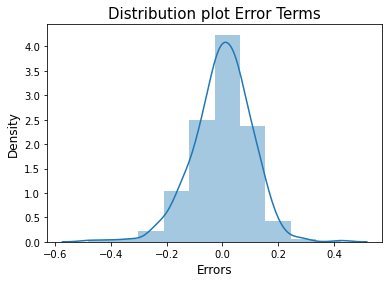

In [60]:
# Plot the histogram of the error terms
sns.distplot((y_train - y_train_cnt), bins = 10)
plt.title("Distribution plot Error Terms", fontsize = 15)   # Plot heading 
plt.xlabel('Errors', fontsize = 12)                         # X-label
plt.ylabel('Density', fontsize = 12)                         # Y-label

The error curve is centered around zero and normally distributed

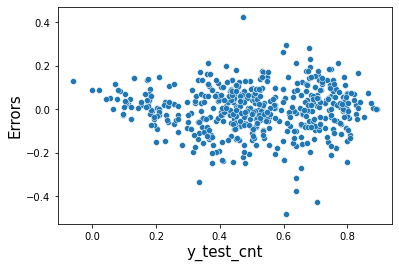

In [61]:
# plotting the error terms
sns.scatterplot(y_train_cnt,y_train - y_train_cnt)
plt.xlabel("y_test_cnt",size = 15)
plt.ylabel("Errors",size = 15)
plt.show()

As per the above plots, errors are independent and have constant variance

## Making Predictions(test)

#### Rescaling the features

In [62]:
# Looking into numerical variables 
num_vars

['temp', 'hum', 'windspeed', 'cnt']

In [63]:
# Applying scaler() to all the columns except the '0 & 1' and 'dummy' variables for test sets
df_test[num_vars]=scaler.transform(df_test[num_vars])
df_test

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_light snow/rain,weathersit_mist cloudy
184,0,1,0,0.831783,0.657364,0.084219,0.692706,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1
535,1,0,1,0.901354,0.610133,0.153728,0.712034,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
299,0,0,1,0.511964,0.837699,0.334206,0.303382,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1
221,0,0,1,0.881625,0.437098,0.339570,0.547400,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
152,0,0,1,0.817246,0.314298,0.537414,0.569029,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,1,0,0,0.257562,0.708888,0.287411,0.336516,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
702,1,0,1,0.519232,0.756118,0.283397,0.757478,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
127,0,0,0,0.584649,0.650923,0.069510,0.495973,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
640,1,0,1,0.745598,0.817947,0.052115,0.868615,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1


#### Dividing into X_test and y_test

In [64]:
y_test = df_test.pop('cnt')
X_test = df_test

In [65]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_vif_5.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)
X_test_new

,const,yr,workingday,windspeed,season_spring,season_summer,season_winter,mnth_jan,mnth_sep,weekday_mon,weathersit_light snow/rain,weathersit_mist cloudy
184,1.0,0,0,0.084219,0,0,0,0,0,0,0,1
535,1.0,1,1,0.153728,0,1,0,0,0,0,0,0
299,1.0,0,1,0.334206,0,0,1,0,0,0,0,1
221,1.0,0,1,0.339570,0,0,0,0,0,0,0,0
152,1.0,0,1,0.537414,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
400,1.0,1,0,0.287411,1,0,0,0,0,0,0,1
702,1.0,1,1,0.283397,0,0,1,0,0,0,0,0
127,1.0,0,0,0.069510,0,1,0,0,0,0,0,0
640,1.0,1,1,0.052115,0,0,1,0,0,0,0,1


In [67]:
# Making Predictions
y_pred=lm_5.predict(X_test_new)
y_pred

184    0.428699
535    0.768473
299    0.365315
221    0.525985
152    0.448065
         ...   
400    0.380272
702    0.711716
127    0.479716
640    0.666548
72     0.293612
Length: 219, dtype: float64

In [68]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7409269375982522

# 6. Model Evaluation

Text(0, 0.5, 'y_pred')

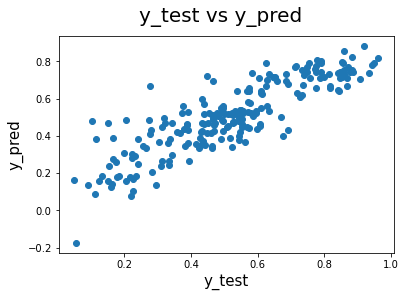

In [70]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=15)                          # X-label
plt.ylabel('y_pred', fontsize=15)                          # Y-label

**Best Model**:

cnt = 0.5334 x const + 0.2480 x yr + 0.0567 x workingday - 0.1887 x windspeed - 0.2581 x season_spring - 0.0406 x season_summer	 - 0.0729 x season_winter - 0.1031 x mnth_jan + 0.0714 x mnth_sep + 0.0650 x weekday_mon - 0.3034 x weathersit_light snow/rain - 0.0888 x weathersit_mist cloudy 